### The Essentials of Exploratory Data Analysis

After the collection of you data, and undergoing the data cleaning and processing, you are ready to perform Data Analysis and Modeling, the third step in the Data Science Life Cycle. Eploratory Data Analysis (EDA), helps us undrstand data and find useful patterns and insights from the data. Using **visuals** to better tell our story, we try to understand the main characteristics of the dataset, identify patterns, look for anomalies and test hypothesis to uncover insights form the data. 
It is a crucial step before you run your data through an algorithm. It helps you detrmine the important variables and those with insignificant impact to the output.

As part of understanding the EDA process, we shall practically incorporate a weather dataset, and undergo the above mentioned steps.
We will try and address the following as our goals for the excercise:

1. Data Overview and Cleaning:
What are the key characteristics of the dataset? (e.g., number of records, features, data types).
Identify and handle any missing or null values. Check for and address any duplicate records as we describe our approach and reasoning.

2. Statistical Summary:
Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
Identify and describe any significant outliers in the data.
3. Data Visualization:
Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
Create correlation matrices and heatmaps to identify relationships between different weather parameters.
4. Weather Patterns and Trends:
Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?
Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?
5. Insights and Conclusions:
Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?
How can these insights be useful for weather prediction or other practical applications?
6. Recommendations for Further Analysis:
Suggest areas for further analysis or additional data that might be useful to explore.

Please note that the dataset was downloaded to a local machine and worked on locally. The dataset is available here.

#### 1. Data Collection and Cleaning
Usually your starting point, we will first import the libraries we shall use, then import our data.
We will try to understand some characteristics about our data as we address our first goal (Data Overview and Cleaning) above. 



In [1]:
# Import Pandas And Numpy 
import pandas as pd
import numpy as np

In [2]:
#import the data to a dataframe
df = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Learning\Data Sci Bootcamp\weather\Weather_Data.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


Viewing the Dataframe using 'df' shows our data has 8784 rows and 8 columns. It also shows us the column labeling. 

You can use this opportunity to rename columns to more usable labels.
E.g., we will rename 'Wind Speed_km/h' to 'Wind Speed_kmh' to remove the '/' symbol, and 'Rel Hum_%' to 'Rel Hum'. This is because these symbols are part of python code operators and will affect the code execution.

In [3]:
df.rename(columns={'Wind Speed_km/h': 'Wind Speed_kmh','Rel Hum_%' : 'Rel Hum'}, inplace=True)
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum,Wind Speed_kmh,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


We can now start performing some **Descriptive Statistics**, starting with the datatypes of each column of the dataframe to know what we will be working with using the 'dtypes' function.

In [4]:
# display teh different datatypes
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum               int64
Wind Speed_kmh        int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

We use the 'describe' function to get a summary of statistics such as count, mean, std etc., for numeric columns (float64 and int64) data types.

In [5]:
# will give summary statistics
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum,Wind Speed_kmh,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


This will give us :
* count: The number of non-null entries.
* mean: The average of the values.
* std: The standard deviation of the values.
* min: The minimum value.
* 25%: The 25th percentile (first quartile).
* 50%: The 50th percentile (median).
* 75%: The 75th percentile (third quartile).
* max: The maximum value.

From this we understand the following:
* There are a total of 8784
* This only shows 6 out of 8 columns as those are non numrical columns. This Function as it is only computes numeric columns (int and float).
* As an example, we can see the average (mean) temperature recorded is 8.8 degrees celcius, ranging between a low of 23.3 and a high of 33 degrees celcius. 
* The median temperature of the dataset is 9.3 degrees celcius that is represented by the 50th percentile.


We  include "(include = 'all')" to include all columns regardless of data type.

In [6]:
# Summary stats regardless of the column datatype
df.describe(include = "all")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum,Wind Speed_kmh,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


This gives additional information, including non numeric columns in the output i.e 'Date/Time' and 'Weather' labeled as 'Object' data types.

There is the addidtion of the below attributes:
* unique: The number of unique values for each column.
* top: The most frequent value (mode).
* freq: The frequency of the most frequent value.

Using the example for 'Weather' column, and refering to the above additional atributes, we can see: 
* unique: there are 50 unique weather conditions recorded.
* top: The most frequent weather conditon (**mode**) is 'Mainly Clear'.
* freq: 'Mainly clear' has been recorded 2106 times out of a total of 8784 weather condition records.

Fields with 'NaN' are fields with data that cant be computed, e.g. There is no mean for Weather as the the column doesnt have numeric values but objects.  

In [7]:
# check for null values
null_values = df.isnull()
null_values

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum,Wind Speed_kmh,Visibility_km,Press_kPa,Weather
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8779,False,False,False,False,False,False,False,False
8780,False,False,False,False,False,False,False,False
8781,False,False,False,False,False,False,False,False
8782,False,False,False,False,False,False,False,False


This gives a view of the data cells. The show "FALSE" because non of the cells is epmty. But this is a very large dataset and  we cannot go through all the cells to determine if and where there is an empty cell.

We include '.sum()' to give a summary of each column and the number of epnty cells in each column.

In [8]:
null_values = df.isnull().sum()
null_values

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum             0
Wind Speed_kmh      0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

This shows us that there are no missing values in our data set.

We can check if there duplicate rows as well, usding the 'duplicated' function.

In [9]:
# identify duplicated rows
duplicates = df.duplicated().sum()
duplicates

0

This gives a list if the row number and weather it is a duplicate row (TRUE) or not (FALSE).

The output lists the whole 8784 row summary, so we include 

In [10]:
# view the count and actual duplicated row
duplicates = df.duplicated().sum()
print('The number of duplicate rows is:',duplicates)
print('The duplicate Rows are:')
df[df.duplicated()]

The number of duplicate rows is: 0
The duplicate Rows are:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum,Wind Speed_kmh,Visibility_km,Press_kPa,Weather


This shows that our dataset has no duplicate rows.

Taking our example for 'Weather' above, we can also look at the categorical groupig of the data in that column, to show us the number of times each condition appears.

In [11]:
for column in df.columns:
    weather_count=df['Temp_C'].value_counts()
    weather_count

#### Summary
We can see that the data we have with us is relatively clean, as there are no duplicate or null values to be dealt with, with minimal cleaning required by editing some column labels.

The most common weather condition recorded was '**Mainly Clear**', with the average (mean) temperature recorded at 8.8 degrees celcius, ranging between a low of 23.3 and a high of 33 degrees celcius.

We will now visualise some of our initial findings to better understand the data before us.
Using a Box plot we can view the below:


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Weather', ylabel='Rel Hum'>

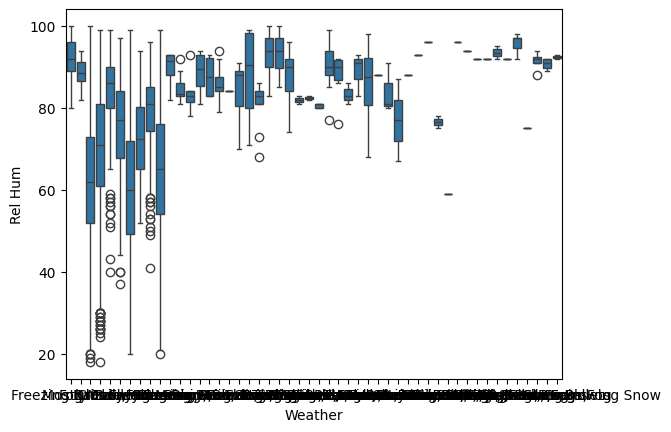

In [15]:
sns.boxplot(x = "Weather", y = "Rel Hum", data = df)

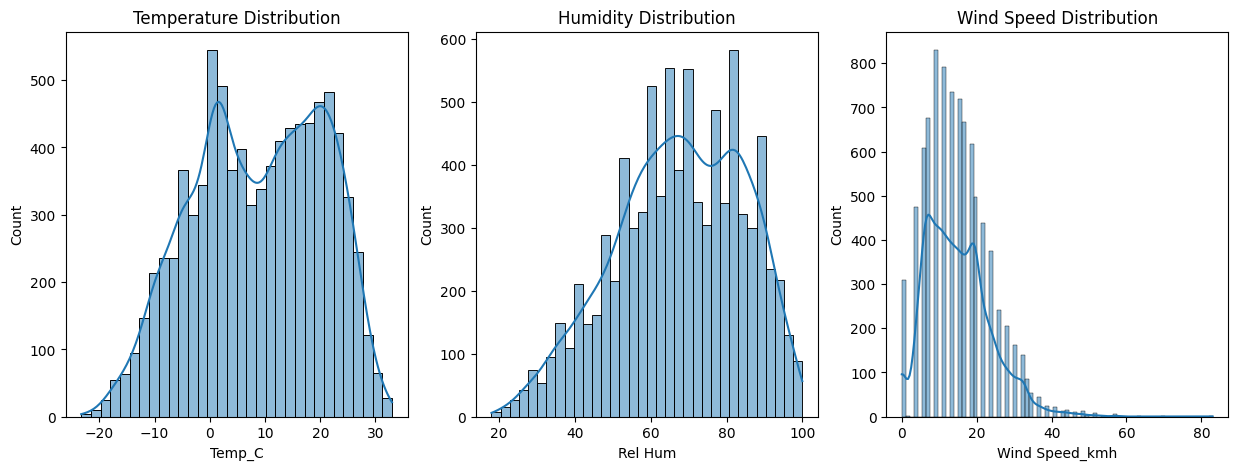

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Temp_C'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Rel Hum'], kde=True)
plt.title('Humidity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Wind Speed_kmh'], kde=True)
plt.title('Wind Speed Distribution')

plt.show()

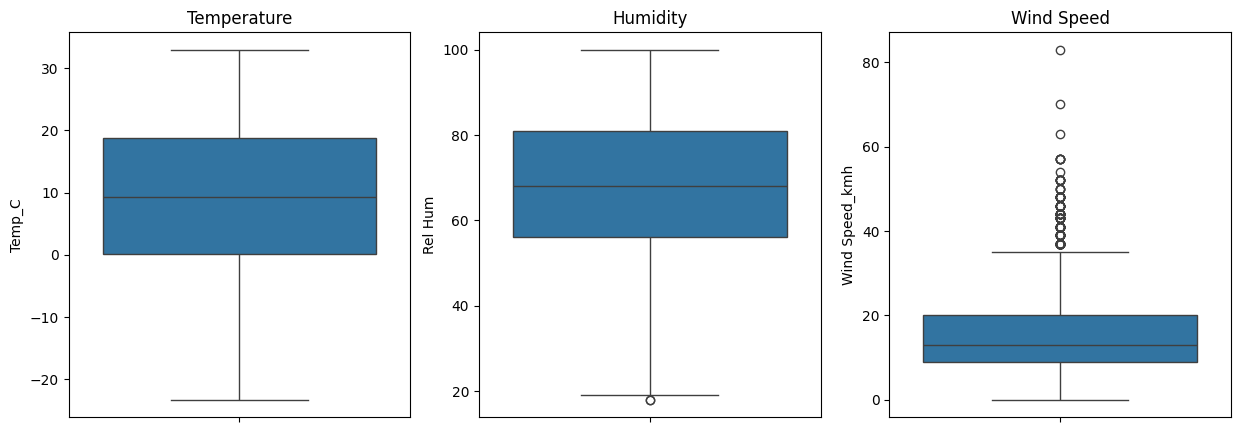

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['Temp_C'])
plt.title('Temperature')

plt.subplot(1, 3, 2)
sns.boxplot(df['Rel Hum'])
plt.title('Humidity')

plt.subplot(1, 3, 3)
sns.boxplot(df['Wind Speed_kmh'])
plt.title('Wind Speed')

plt.show()

In [19]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum,Wind Speed_kmh,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


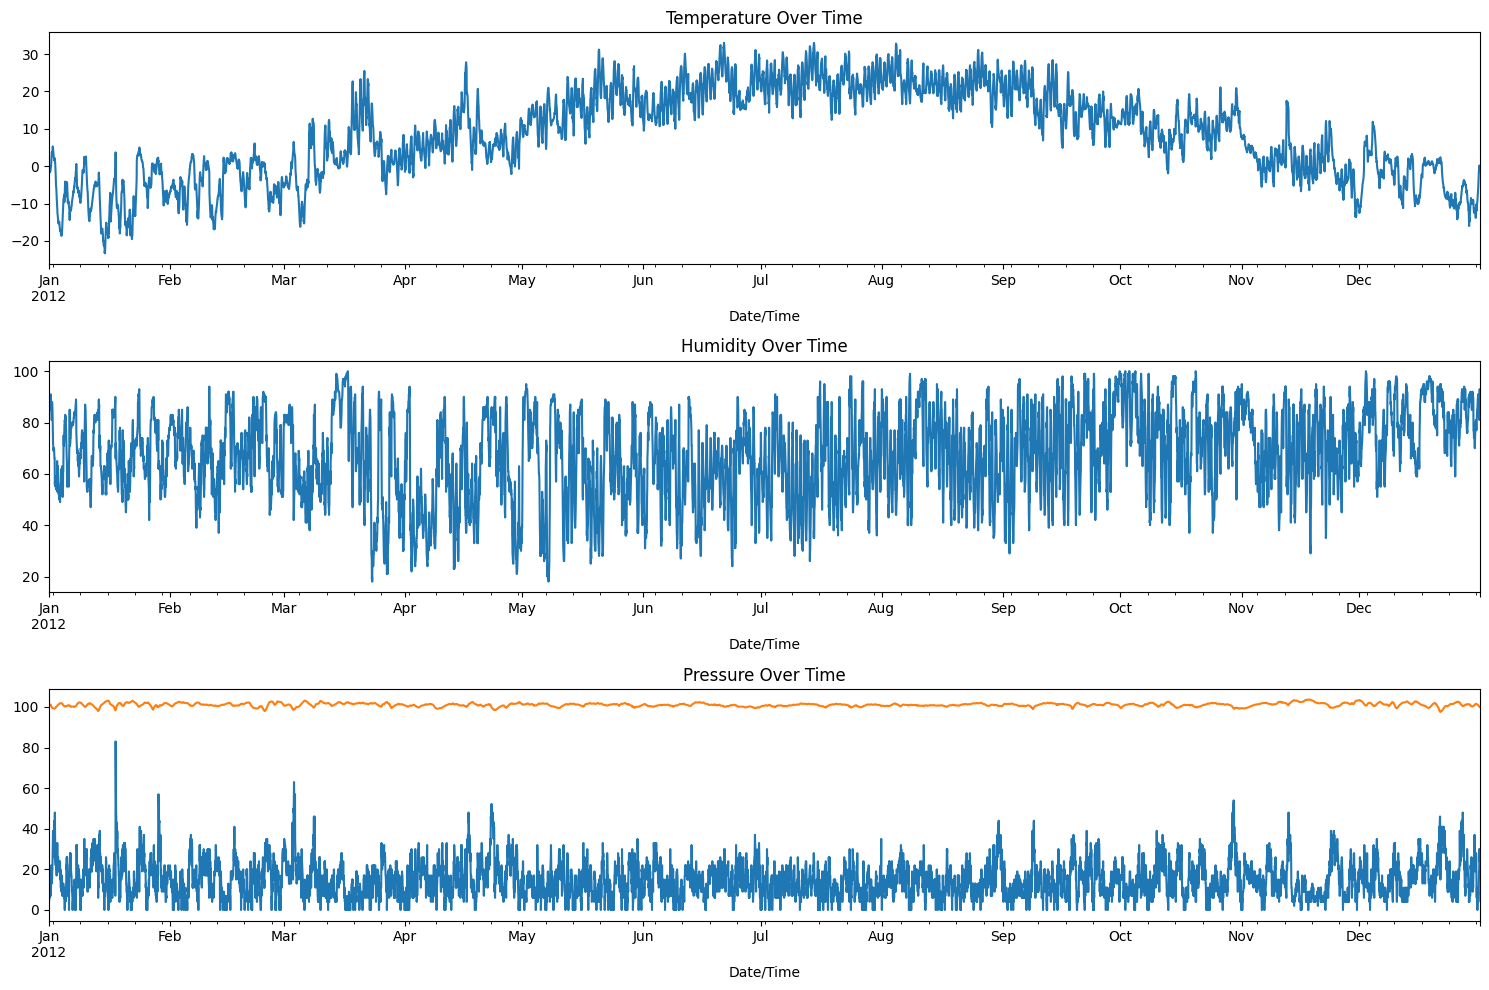

In [30]:

# Time series plots
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
df['Temp_C'].plot()
plt.title('Temperature Over Time')

plt.subplot(3, 1, 2)
df['Rel Hum'].plot()
plt.title('Humidity Over Time')

plt.subplot(3, 1, 3)
df['Wind Speed_kmh'].plot()
plt.title('Wind Speed Over Time')

plt.subplot(3, 1, 3)
df['Press_kPa'].plot()
plt.title('Pressure Over Time')

plt.tight_layout()
plt.show()

In [33]:
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()
corr_matrix


,Temp_C,Dew Point Temp_C,Rel Hum,Wind Speed_kmh,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_kmh,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


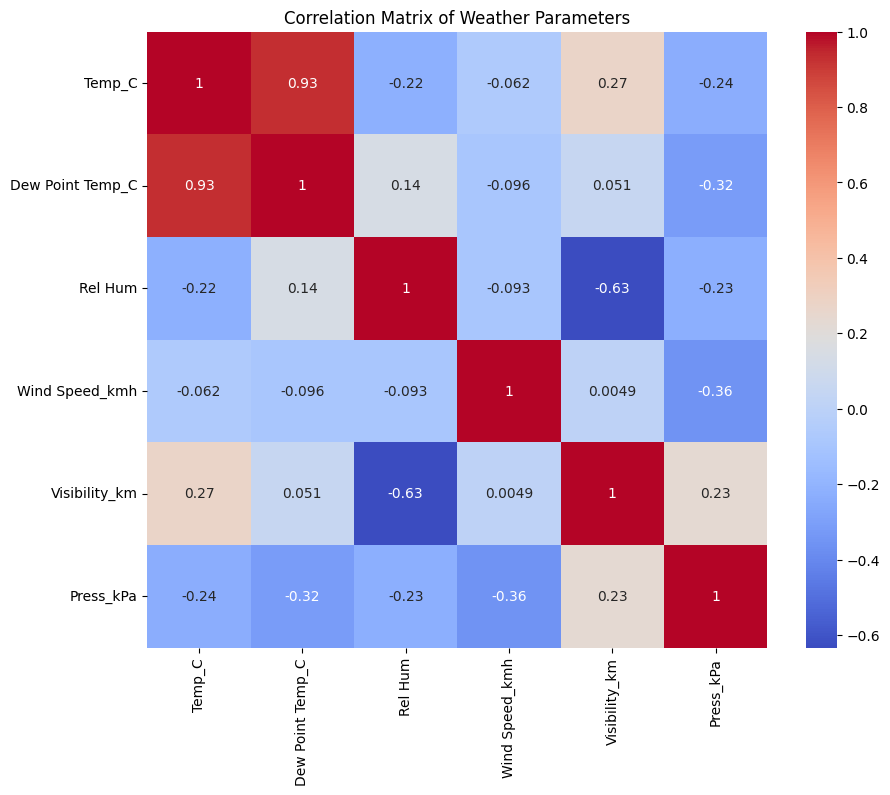

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Parameters')
plt.show()